In [78]:
# data from: https://arcticdata.io/catalog/view/doi%3A10.18739%2FA2FT8DK8Z
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import glob
import os
import csv

wl_4b = np.asarray([490, 565, 665, 865])
wl_8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])

In [2]:
def plot_spectra(df, title):
    plt.figure(figsize=(12,6))
    # get the wavelengths from the first column
    wl = df.iloc[:, 0]
    # Loop through the rest of the columns (y-values) and plot them
    for col_name in df.columns[1:]:
        y_values = df[col_name]
        plt.plot(wl, y_values, label=col_name)
    for wl_val in wl_4b:
        plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.25)
    for wl_val in wl_8b:
        plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.25)
    # Add labels and legend to the plot
    plt.xlabel("Reflectance")
    plt.ylabel("Wavelength (nm)")
    plt.grid(True)
    plt.title(title)
    #plt.legend()
    # Show the plot
    plt.show()

def find_row_with_wavelengths(csv_file_path):
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for index, row in enumerate(reader):
            if 'Wavelengths' in row:
                return index

class spectral_library:
  def __init__(self, wl):
    self.spectra = np.zeros((0))
    self.spectra8b = np.zeros((0))
    self.spectra4b = np.zeros((0))
    self.wl = wl
    self.wl8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])
    self.wl4b = np.asarray([490, 565, 665, 865])
    self.nBands = len(wl)
    self.nSpec = 0
    self.names = []
  def add(self, spec, name=''): 
    if len(self.spectra) == 0:
        self.spectra = spec
    else:
        self.spectra = np.row_stack((self.spectra, spec))
    self.names.append(name)
    self.nSpec = self.nSpec + 1
  def resample_planet8b(self):
    self.spectra8b = np.zeros((self.nSpec,8))
    band_ranges = [[431,451],[465,515],[513,549],[547,583],[600,620],[650,682],[697,713],[845,885]]
    for spec_idx in range(self.nSpec):
        for band_idx in range(8):
            low = band_ranges[band_idx][0]
            high = band_ranges[band_idx][1]
            val = 0
            count = 0
            idx_list = np.where((self.wl>low)*(self.wl<high))
            #print(idx_list)
            for i in idx_list[0]:
                #print(spec_idx)
                #print(i)
                #print(np.isfinite(self.spectra[spec_idx,i]))
                if np.isfinite(self.spectra[spec_idx,i]):
                    val = val + self.spectra[spec_idx,i]
                    count = count + 1
            if count>0:
                self.spectra8b[spec_idx,band_idx] = val/count
            else:
                self.spectra8b[spec_idx,band_idx] = np.NaN


In [3]:
current_directory = os.getcwd()
csv_files = glob.glob(os.path.join(current_directory, "data\SpectralAlbedoData\*.csv"))

# get the wavelengths:
idx = find_row_with_wavelengths(csv_files[0])
df = pd.read_csv(csv_files[0], header=idx)
wl = df.iloc[:, 0]
sli = spectral_library(wl)

# Iterate through each CSV file and perform the desired operations
for csv_file in csv_files:
    if csv_file[-3:]=='csv':
        # read the spectra into a dataframe
        idx = find_row_with_wavelengths(csv_file)
        df = pd.read_csv(csv_file, header=idx)
        # add to the spectral library
        for col_name in df.columns[1:]:
            sli.add(df[col_name], name=col_name)
        #plot_spectra(df, csv_file[csv_file.rfind('\\'):])

In [105]:
print(sli.wl[1])
print(sli.spectra[1])

351
(2712, 2151)


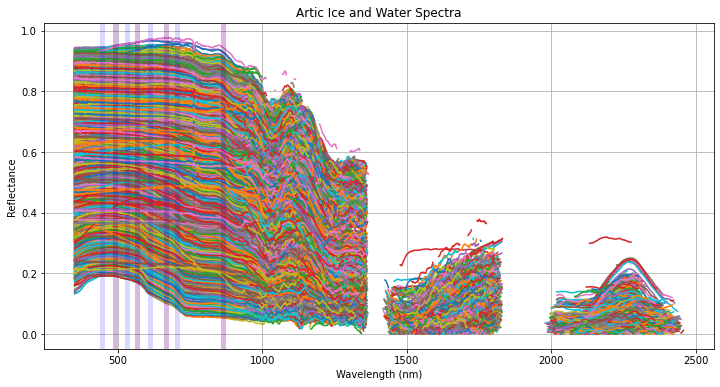

In [4]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra[idx,:]
    plt.plot(wl, y_values, label=sli.names[idx])
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra')
#plt.legend()
# Show the plot
plt.show()

In [4]:
print(sli.names[1])

Albedo1


In [12]:
#sli.resample_planet8b()

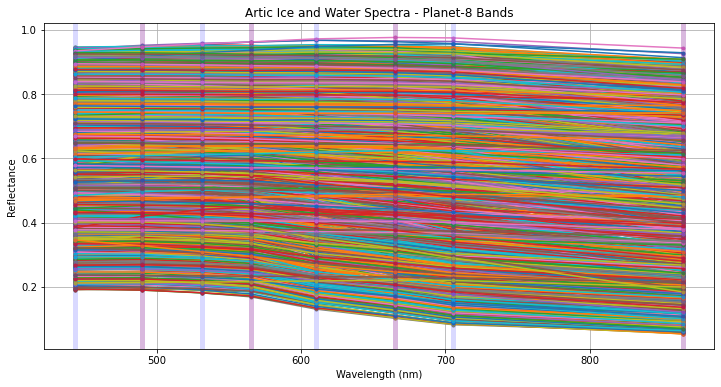

In [6]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values, label=sli.names[idx], marker='.')
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands')
#plt.legend()
# Show the plot
plt.show()

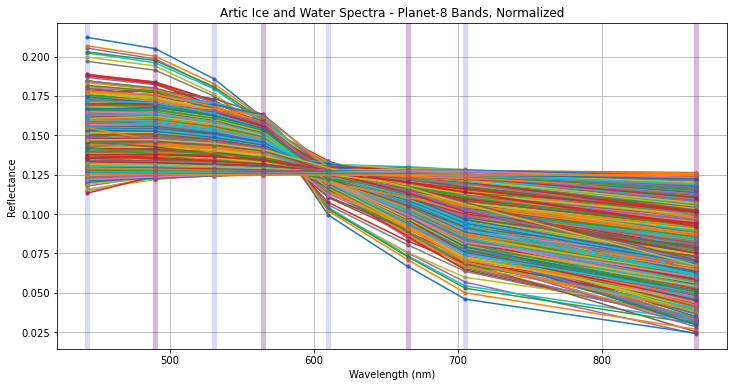

In [43]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values/np.sum(y_values), label=sli.names[idx], marker='.')
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
#plt.legend()
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands, Normalized')
#plt.legend()
# Show the plot
plt.show()

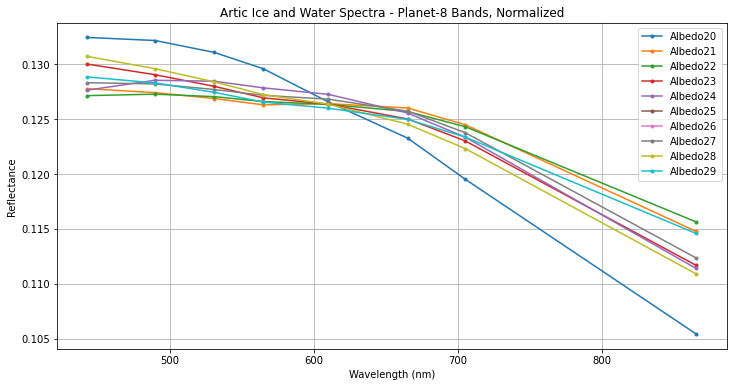

In [48]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(200,210):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values/np.sum(y_values), label=sli.names[idx], marker='.')
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.legend()
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands, Normalized')
#plt.legend()
# Show the plot
plt.show()

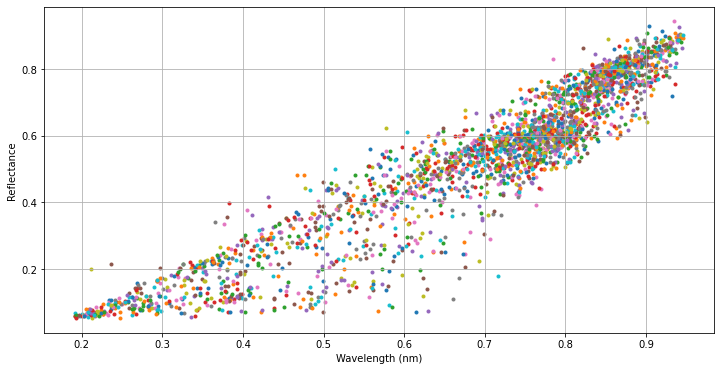

In [8]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.scatter(y_values[0],y_values[7], label=sli.names[idx], marker='.')
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
#plt.legend()
# Show the plot
plt.show()

In [5]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming sli.spectra8b is your 2D array

# Create a boolean mask to identify rows without NaN values
# mask = ~np.isnan(sli.spectra8b).any(axis=1)
mask = ~np.isnan(sli).any(axis=1)

# Use the mask to filter out rows with NaN values
#data = sli.spectra8b[mask, :]
data = sli[mask, :]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [6]:
#data = sli.spectra8b[~np.isnan(sli.spectra8b).any(axis=1),:]
data = sli
pca = PCA()
pca.fit(data)
pca_spec = pca.transform(data)
plt.scatter(pca_spec[0,:],pca_spec[1,:], marker='.')

TypeError: float() argument must be a string or a number, not 'spectral_library'

In [94]:
data.shape

(720, 1404)

In [79]:
sli.nSpec, sli.nBands

(2712, 2151)

2388969
(2712, 2151)
0


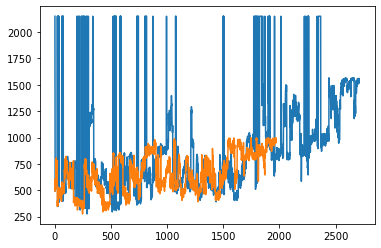

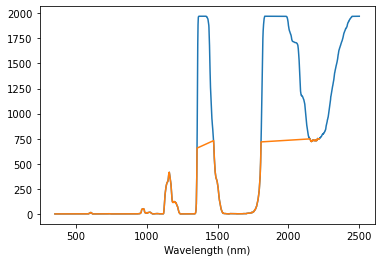

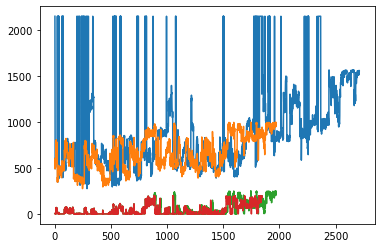

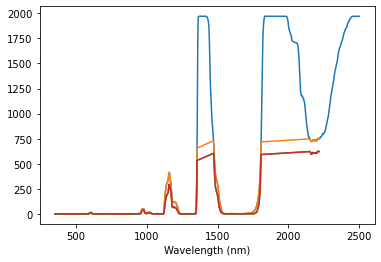

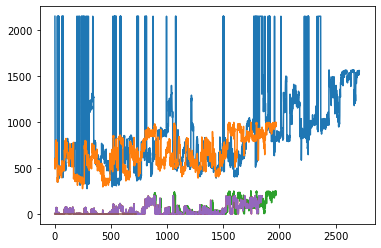

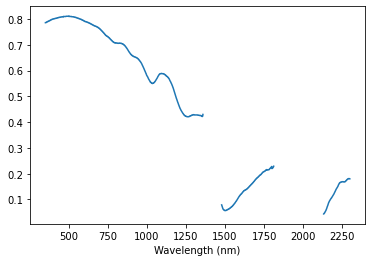

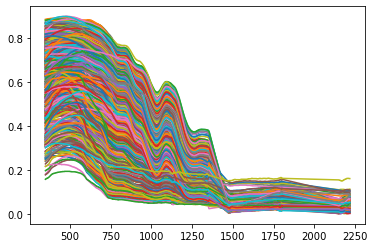

In [9]:
nan_mask = np.isnan(sli.spectra) 
nRows, nCols = nan_mask.shape
row_idx = np.arange(nRows)
col_idx = np.arange(nCols)
print(np.sum(nan_mask))
print(nan_mask.shape)

# reducing number of spectra
col_sum1 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum1<1000,:]
row_idx = row_idx[col_sum1<1000]
col_sum2 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)

# reducing number of bands
row_sum1 = np.sum(nan_mask, axis=0)
nan_mask = nan_mask[:,row_sum1<750]
col_idx = col_idx[row_sum1<750]
row_sum2 = np.sum(nan_mask, axis=0)
plt.figure()
plt.plot(wl,row_sum1)
wl2 = wl[row_sum1<750]
plt.plot(wl2,row_sum2)
plt.xlabel("Wavelength (nm)")

# reducing number of spectra
col_sum3 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum3<200,:]
row_idx = row_idx[col_sum3<200]
col_sum4 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)
plt.plot(col_sum3)
plt.plot(col_sum4)

# reducing number of bands
row_sum3 = np.sum(nan_mask, axis=0)
nan_mask = nan_mask[:,row_sum3<750]
col_idx = col_idx[row_sum3<750]
row_sum4 = np.sum(nan_mask, axis=0)
plt.figure()
plt.plot(wl,row_sum1)
plt.plot(wl2,row_sum2)
plt.plot(wl2,row_sum3)
wl3 = wl2[row_sum3<750]
plt.plot(wl3,row_sum4)
plt.xlabel("Wavelength (nm)")

# reducing number of spectra
col_sum5 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum5<1,:]
row_idx = row_idx[col_sum5<1]
col_sum6 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)
plt.plot(col_sum3)
plt.plot(col_sum4)
plt.plot(col_sum5)
plt.plot(col_sum6)

plt.figure()
plt.plot(wl,sli.spectra[100,:]);
plt.xlabel("Wavelength (nm)")

print(np.sum(nan_mask))
data = sli.spectra[row_idx,:]
data = data[:,col_idx]
plt.figure()
plt.plot(wl3,data.T);

In [10]:
print(wl3[150], wl3[650])

500 1000


In [13]:
wl3

0        350
1        351
2        352
3        353
4        354
        ... 
1862    2212
1863    2213
1864    2214
1865    2215
1867    2217
Name: Wavelengths, Length: 1404, dtype: int64

In [12]:
print(data[1,150])
print(data[1,650] )

0.595
0.249


In [19]:
print(data.shape) 

############ THIS IS 1404 WAVELENGTHS WITH 720 ALBEDOS #######################

pca = PCA(whiten=True, n_components=10)
pca.fit(data)
pca_spec = pca.transform(data)
print(pca_spec.shape)


(720, 1404)
(720, 10)


In [50]:
print(data[3,:])

[0.464 0.466 0.468 ... 0.072 0.072 0.073]


In [26]:
print(pca_spec)

[[ 0.96292473  0.83383875  0.92412064 ... -0.55724485  1.53389223
   1.69011094]
 [ 0.8653399   0.88516673  0.6267475  ...  2.46997552  2.45941575
   1.43280063]
 [ 2.48710199  2.79639332  2.99080829 ... -0.29690669  0.73623901
  -1.09537665]
 ...
 [ 4.22345161  4.27277755  4.81307917 ...  0.28982719 -1.9440318
   2.15131775]
 [ 0.10800919 -1.73674497  0.23171737 ... -2.57450178 -3.76010293
   0.09856844]
 [ 0.05042871  1.73315374  0.56770387 ...  1.08383282  1.853882
   0.23434999]]


In [20]:
# Access the principal components
principal_components = pca.components_

print(principal_components[0,:])
print(principal_components.shape)

# Magnitude of Values: The magnitude of the values in a principal component's vector indicates the 
# strength of the relationship between the original features and that particular principal component. 
# Larger magnitudes suggest stronger contributions from those features.


[-0.03401141 -0.03398148 -0.03395176 ...  0.00031747  0.00029732
  0.00027329]
(10, 1404)


In [21]:
print(principal_components.shape[1])

1404


In [46]:
################ THESE FEATURES HAVE THE STRONGEST RELATIONSHIP WITH PCA_0. ###################
################ I THINK THESE ARE ALBEDO COLUMNS FROM CSV FILES? ################

for i in range((principal_components.shape[1])):
    if principal_components[0,i]>0.00156:
        print (i, principal_components[0,i])

1036 0.0015606821691156849
1037 0.0015623837272355366
1039 0.0015653265881531626
1040 0.0015646437929961036
1041 0.0015662765350827857
1042 0.001562325613594995
1043 0.0015634154025225958
1044 0.0015612765165712614


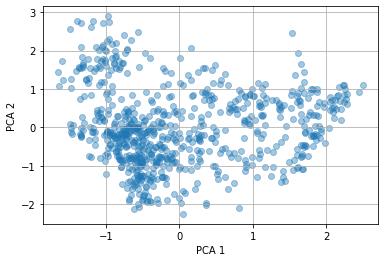

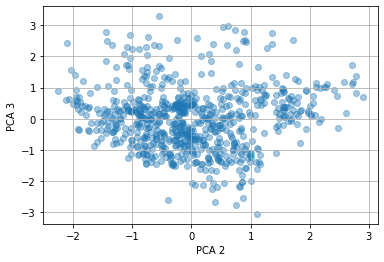

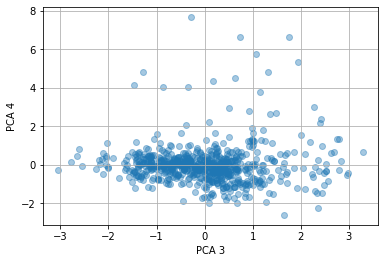

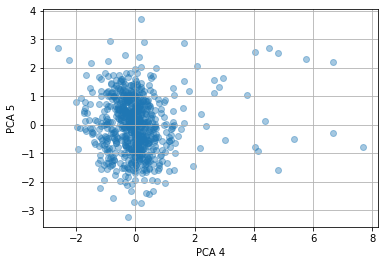

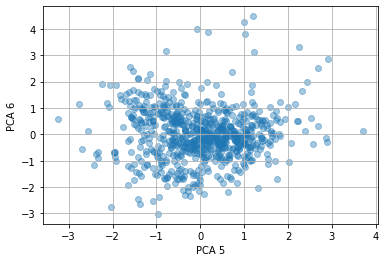

In [11]:
plt.figure()
plt.scatter(pca_spec[0,:],pca_spec[1,:], alpha=0.4)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[1,:],pca_spec[2,:], alpha=0.4)
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[2,:],pca_spec[3,:], alpha=0.4)
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[3,:],pca_spec[4,:], alpha=0.4)
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[4,:],pca_spec[5,:], alpha=0.4)
plt.xlabel('PCA 5')
plt.ylabel('PCA 6')
plt.grid(True)

In [25]:
print(wl3[150], wl3[650])
#len(pca_spec[:,0])

500 1000


720

In [85]:
print(wl3[182], wl3[714])
#len(pca_spec[:,0])

532 1064


In [23]:
BWI = (data[:,150] - data[:,650])/(data[:,150] + data[:,650])
print(len(BWI))

720


In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.figure()
plt.scatter(pca_spec[0,:],pca_spec[1,:], c=BWI, alpha=0.4)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[1,:],pca_spec[2,:], c=BWI, alpha=0.4)
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[2,:],pca_spec[3,:], c=BWI, alpha=0.4)
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[3,:],pca_spec[4,:], c=BWI, alpha=0.4)
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[4,:],pca_spec[5,:], c=BWI, alpha=0.4)
plt.xlabel('PCA 5')
plt.ylabel('PCA 6')
plt.grid(True)

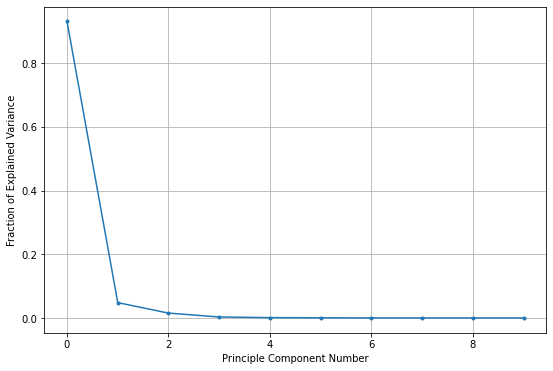

In [12]:
plt.figure(figsize=(9,6))
plt.plot(pca.explained_variance_ratio_, marker='.')
plt.xlabel('Principle Component Number')
plt.ylabel('Fraction of Explained Variance')
plt.grid(True)

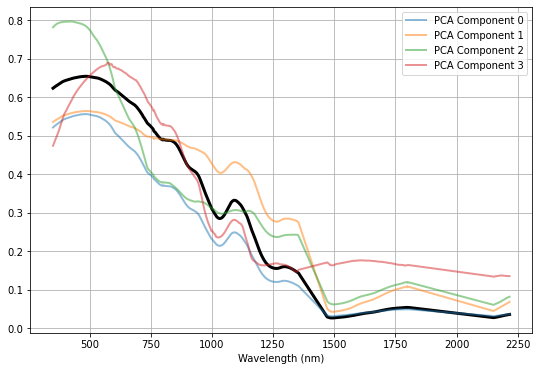

In [13]:
plt.figure(figsize=(9,6))
plt.plot(wl3, pca.mean_, 'k', linewidth=3)
for i in range(4):
    #note: I am multiplying by 2 to see the variation in the PCS better 
    plt.plot(wl3, pca.mean_ + 3*pca.components_[i,:], linewidth=2, label='PCA Component '+str(i), alpha=0.5)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.legend();

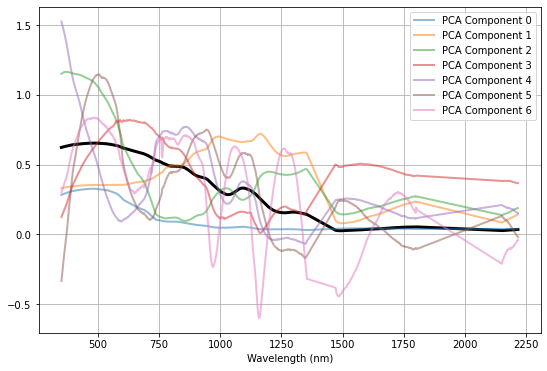

In [9]:
plt.figure(figsize=(9,6))
plt.plot(wl3, pca.mean_, 'k', linewidth=3)
for i in range(7):
    #note: I am multiplying by 2 to see the variation in the PCS better 
    plt.plot(wl3, pca.mean_ + 10*pca.components_[i,:], linewidth=2, label='PCA Component '+str(i), alpha=0.5)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.legend();

# Manifold Learning Stuff Starts Here

In [187]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from matplotlib.cm import ScalarMappable
from sklearn import (manifold, datasets, decomposition, ensemble, #lda,
                     random_projection)

### Needed to remove lda from sklearn due to error -- add back in later? ###


digits = datasets.load_digits(n_class=6)
Xd = digits.data
yd = digits.target

print(Xd.shape)
print(yd.shape)

#n_samples, n_features = X.shape
#n_neighbors = 30


sli.resample_planet8b()

X = sli.spectra8b
y = np.arange(X.shape[0])

print(X.shape)
print(y.shape)

In [23]:
X = data
y = np.arange(X.shape[0])

print(X.shape)
print(y.shape)

############ THIS IS 720 ALBEDOS AND 1404 WAVELENGTHS #######################


(720, 1404)
(720,)


In [216]:
thumbnails = [plt.imread("1_dry_snow.png"), plt.imread("2_melting_snow.png"), plt.imread("3_bare_ice.png"), 
              plt.imread("5_sediment_ice.png"), plt.imread("6_light_pond.png"), plt.imread("8_dark_pond.png")]  


In [217]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors with DOTS and THUMBNAILS.
# Thumbnails are placed using wl = 532 (highest reflectance).

def plot_embedding_yesthumb1(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   ### normalize ###

    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)  ### for thumbnails ###
    sm = ScalarMappable(cmap=plt.cm.viridis)
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1],
        #plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.viridis((data[i,182] - data[i,714])/(data[i,182] + data[i,714])))
                 #wl3[182], wl3[714]
                 #fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        #thumbnail = thumbnails[i % len(thumbnails)]  ### THIS NEEDS TO BE UPDATED WITH CORRECT THUMBNAIL ###
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #if np.max(data[i,:]) >= 0.8:
                #thumbnail = thumbnails[0]
            if (data[i,182]) >= 0.85:
                thumbnail = thumbnails[0]
            #elif (data[i,182]) < 0.85 and np.max(data[i,:]) >= 0.78:
            elif (data[i,182]) < 0.85 and (data[i,182]) >= 0.78:
                thumbnail = thumbnails[1]
            elif (data[i,182]) < 0.78 and (data[i,182]) >= 0.7:
                thumbnail = thumbnails[2]
            elif (data[i,182]) < 0.7 and (data[i,182]) >= 0.6:
                thumbnail = thumbnails[3]
            elif (data[i,182]) < 0.6 and (data[i,182]) >= 0.3:
                thumbnail = thumbnails[4]
            elif (data[i,182]) < 0.3:
                thumbnail = thumbnails[5]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xlabel('Water / Ice Ratio')
    plt.ylabel('Y LABEL')
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)


In [218]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors with DOTS and THUMBNAILS.
# Thumbnails are placed using wl = 1064 (lowest reflectance).

def plot_embedding_yesthumb2(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   ### normalize ###

    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)  ### for thumbnails ###
    sm = ScalarMappable(cmap=plt.cm.rainbow)
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        scr = plt.scatter(X[i, 0], X[i, 1],
        #plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color = plt.cm.rainbow((data[i,182] - data[i,714])/(data[i,182] + data[i,714])))
                 #wl3[182], wl3[714]
                 #fontdict={'weight': 'bold', 'size': 9})
        
    if hasattr(offsetbox, 'AnnotationBbox'):
        #thumbnail = thumbnails[i % len(thumbnails)]  ### THIS NEEDS TO BE UPDATED WITH CORRECT THUMBNAIL ###
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #if np.max(data[i,:]) >= 0.8:
                #thumbnail = thumbnails[0]
            if (data[i,714]) >= 0.65:
                thumbnail = thumbnails[0]
            #elif (data[i,182]) < 0.85 and np.max(data[i,:]) >= 0.78:
            elif (data[i,714]) < 0.65 and (data[i,714]) >= 0.5:
                thumbnail = thumbnails[1]
            elif (data[i,714]) < 0.5 and (data[i,714]) >= 0.35:
                thumbnail = thumbnails[2]
            elif (data[i,714]) < 0.35 and (data[i,714]) >= 0.2:
                thumbnail = thumbnails[3]
            elif (data[i,714]) < 0.2 and (data[i,714]) >= 0.1:
                thumbnail = thumbnails[4]
            elif (data[i,714]) < 0.1:
                thumbnail = thumbnails[5]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xlabel('Water / Ice Ratio')
    plt.ylabel('Y LABEL')
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)


In [219]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors with TEXT and THUMBNAILS.
# Thumbnails are placed using wl = 1064 (lowest reflectance).

thumbnails = [plt.imread("1_dry_snow.png"), plt.imread("2_melting_snow.png"), plt.imread("3_bare_ice.png"), 
              plt.imread("5_sediment_ice.png"), plt.imread("6_light_pond.png"), plt.imread("8_dark_pond.png")]  

def plot_embedding_yesthumb3(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   ### normalize ###

    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)  ### for thumbnails ###
    sm = ScalarMappable(cmap=plt.cm.cool)
    sm.set_array([])  # Create an empty array to attach the colormap to the colorbar

    for i in range(X.shape[0]):
        #plt.scatter(X[i, 0], X[i, 1],
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.cool((data[i,182] - data[i,714])/(data[i,182] + data[i,714])),
                 #wl3[182], wl3[714]
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        #thumbnail = thumbnails[i % len(thumbnails)]  ### THIS NEEDS TO BE UPDATED WITH CORRECT THUMBNAIL ###
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]): 
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #if np.max(data[i,:]) >= 0.8:
                #thumbnail = thumbnails[0]
            if (data[i,714]) >= 0.65:
                thumbnail = thumbnails[0]
            #elif (data[i,182]) < 0.85 and np.max(data[i,:]) >= 0.78:
            elif (data[i,714]) < 0.65 and (data[i,714]) >= 0.5:
                thumbnail = thumbnails[1]
            elif (data[i,714]) < 0.5 and (data[i,714]) >= 0.35:
                thumbnail = thumbnails[2]
            elif (data[i,714]) < 0.35 and (data[i,714]) >= 0.2:
                thumbnail = thumbnails[3]
            elif (data[i,714]) < 0.2 and (data[i,714]) >= 0.1:
                thumbnail = thumbnails[4]
            elif (data[i,714]) < 0.1:
                thumbnail = thumbnails[5]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.05),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xlabel('Water / Ice Ratio')
    plt.ylabel('Y LABEL')
    plt.colorbar(sm)
    if title is not None:
        plt.title(title)

# baseline water index = BWI

### Below are plots of 720 albedos. BWI colors based on reflectance differences at wl=532 and wl=1064.

Computing random projection


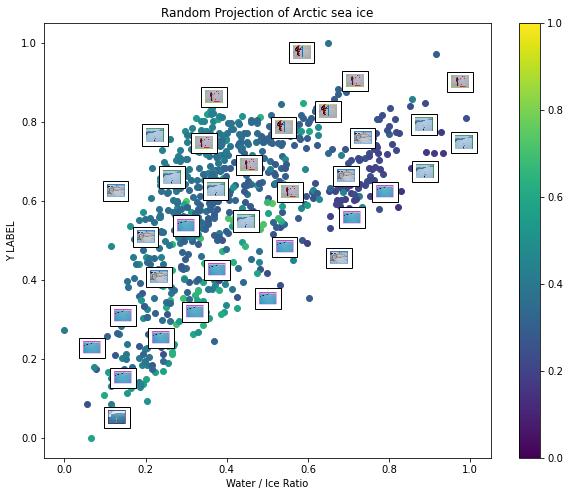

In [196]:
#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding_yesthumb1(X_projected, "Random Projection of Arctic sea ice")


Computing random projection


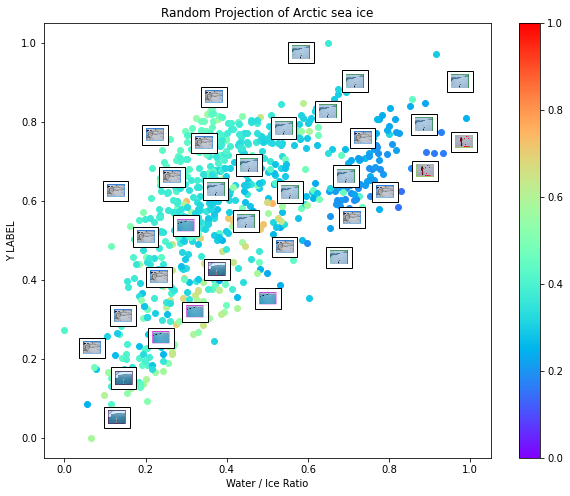

In [193]:
#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding_yesthumb2(X_projected, "Random Projection of Arctic sea ice")


Computing random projection


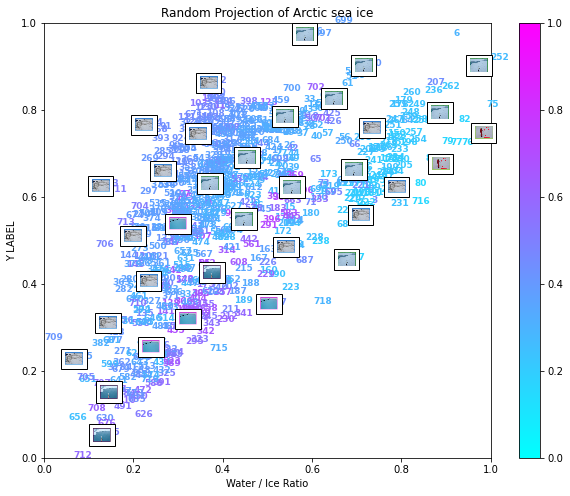

In [201]:
#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding_yesthumb3(X_projected, "Random Projection of Arctic sea ice")


Computing PCA projection


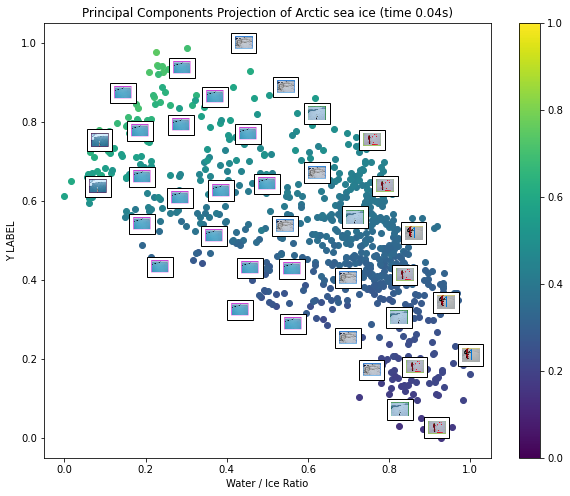

In [197]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding_yesthumb1(X_pca,
               "Principal Components Projection of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing PCA projection


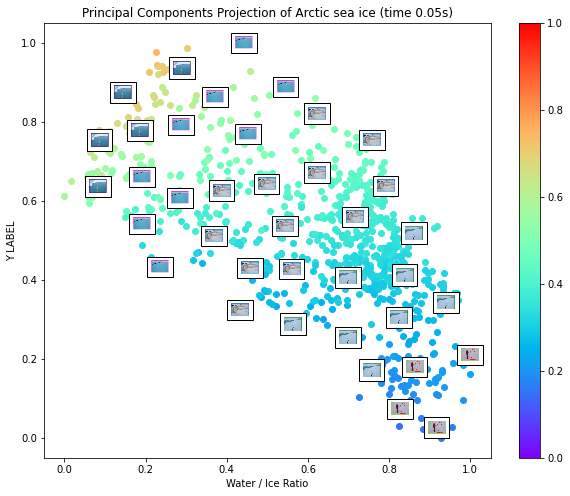

In [198]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding_yesthumb2(X_pca,
               "Principal Components Projection of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing PCA projection


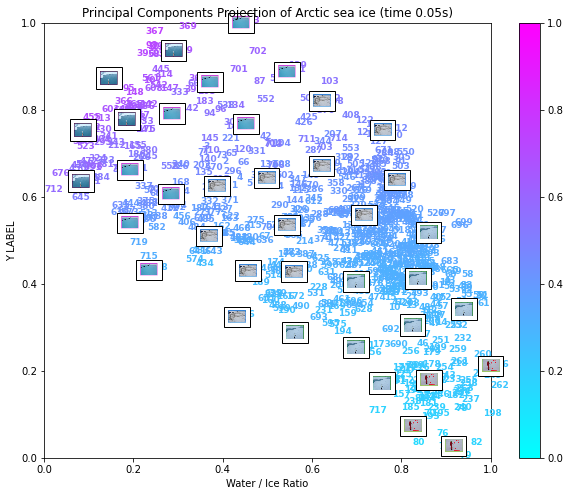

In [202]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding_yesthumb3(X_pca,
               "Principal Components Projection of Arctic sea ice (time %.2fs)" %
               (time() - t0))


In [ ]:
### FOR LABELS ON DOTS ###

from pyvis.network import Network
import networkx as nx
from scipy.cluster.hierarchy import linkage, fcluster

# Perform hierarchical clustering
linkage_matrix = linkage(df2, method='single')
clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

net.barnes_hut()

# Add nodes and edges
for i in range(len(X_pca)):
    network.add_node(i, title=i)

net.toggle_physics(True)
net.save_graph('net_graph_df2_0803b.html')

# When this finishes running, go to your folder and open the html file.  
# It will take a minute (more or less) to build depending on your laptop speed.

In [30]:
X_pca[2]

array([11.0087758 ,  1.30241276])

Computing Isomap embedding


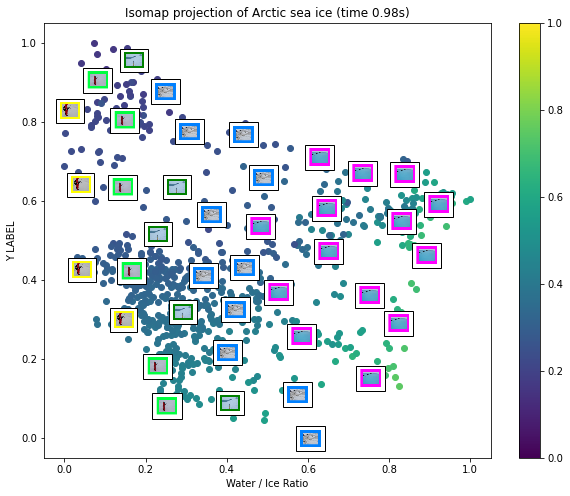

In [220]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
#print("Done.")
plot_embedding_yesthumb1(X_iso,
               "Isomap projection of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing Isomap embedding


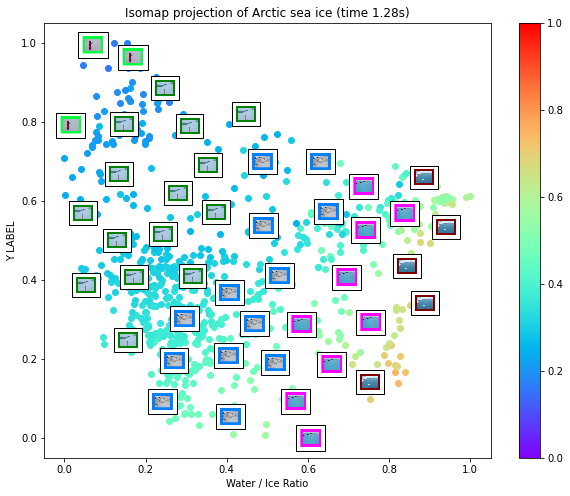

In [221]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(X)
#print("Done.")
plot_embedding_yesthumb2(X_iso,
               "Isomap projection of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing Isomap embedding


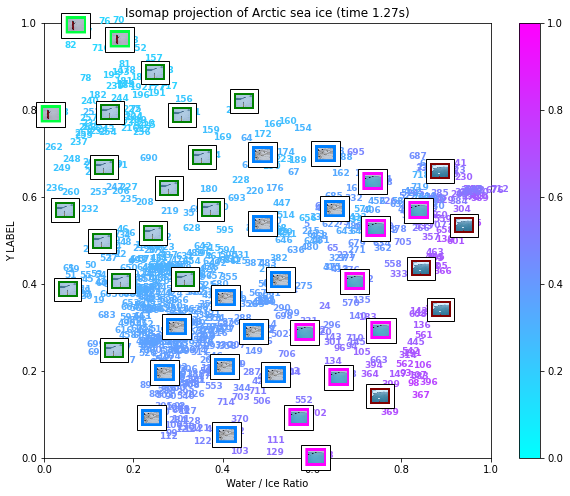

In [222]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(X)
#print("Done.")
plot_embedding_yesthumb3(X_iso,
               "Isomap projection of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing LLE embedding
Reconstruction error: 1.34362e-06


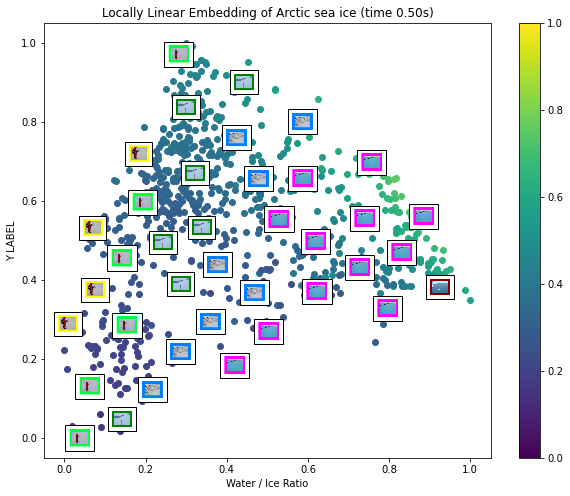

In [223]:
#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset

print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb1(X_lle,
               "Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing LLE embedding
Reconstruction error: 1.34361e-06


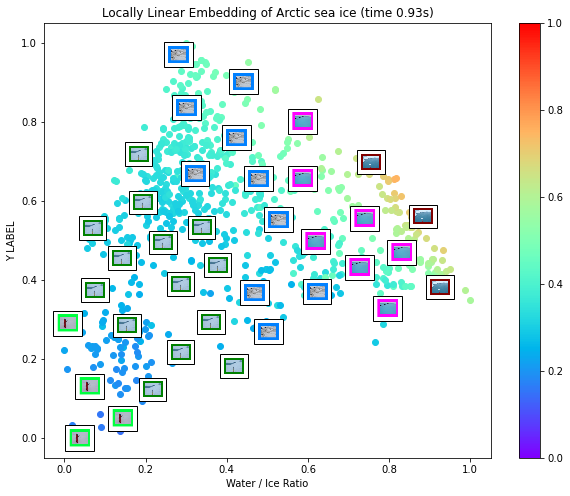

In [224]:
#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset

print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb2(X_lle,
               "Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing LLE embedding
Reconstruction error: 1.34362e-06


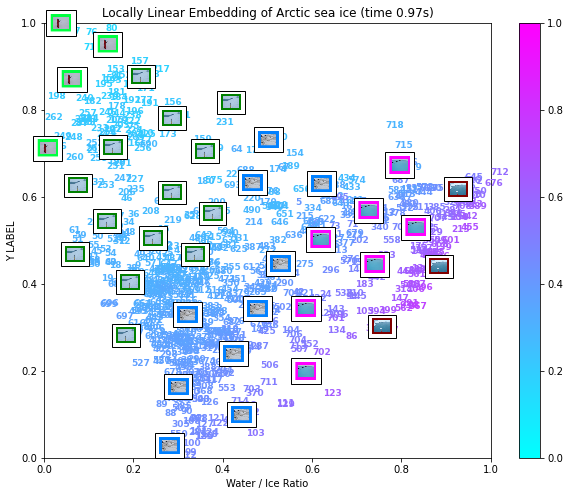

In [225]:
#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset

print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb3(X_lle,
               "Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing modified LLE embedding
Reconstruction error: 0.0940717


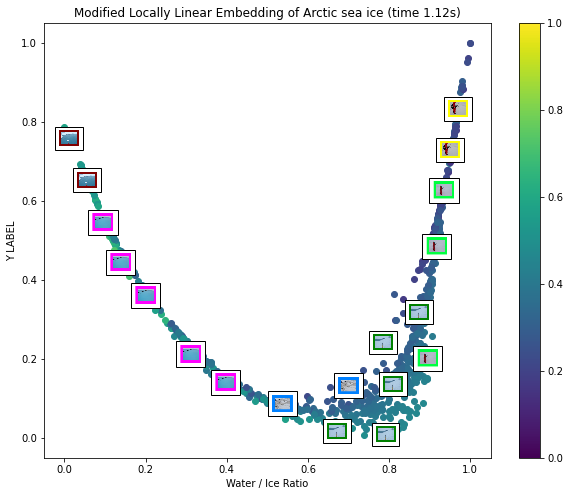

In [226]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb1(X_mlle,
               "Modified Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing modified LLE embedding
Reconstruction error: 0.0940701


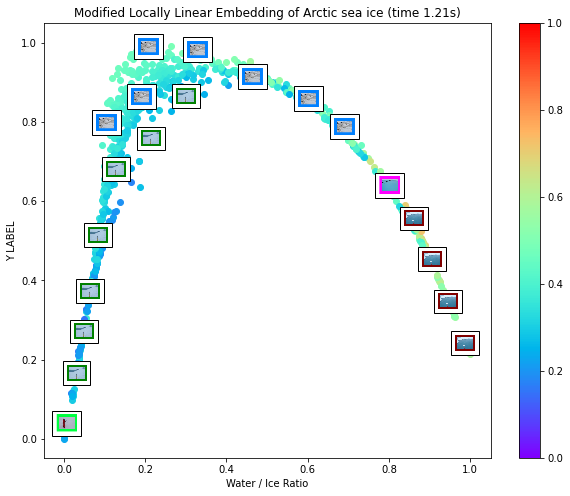

In [227]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb2(X_mlle,
               "Modified Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing modified LLE embedding
Reconstruction error: 0.0940667


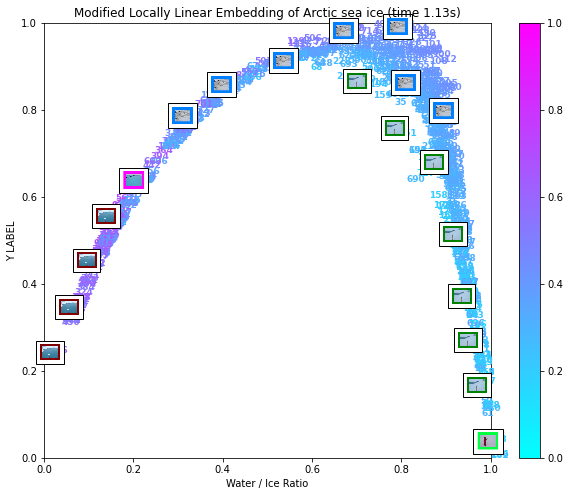

In [228]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb3(X_mlle,
               "Modified Locally Linear Embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing LTSA embedding
Reconstruction error: 0.0364018


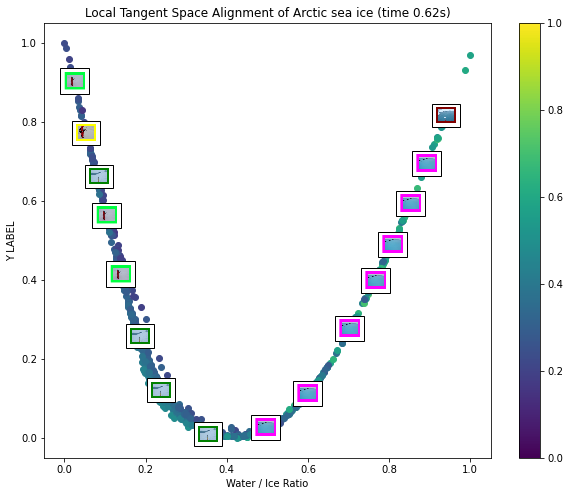

In [229]:
#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb1(X_ltsa,
               "Local Tangent Space Alignment of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing LTSA embedding
Reconstruction error: 0.0364013


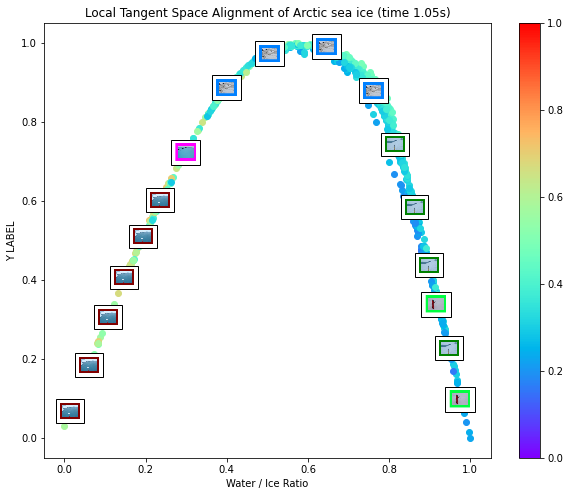

In [230]:
#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb2(X_ltsa,
               "Local Tangent Space Alignment of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing LTSA embedding
Reconstruction error: 0.0364017


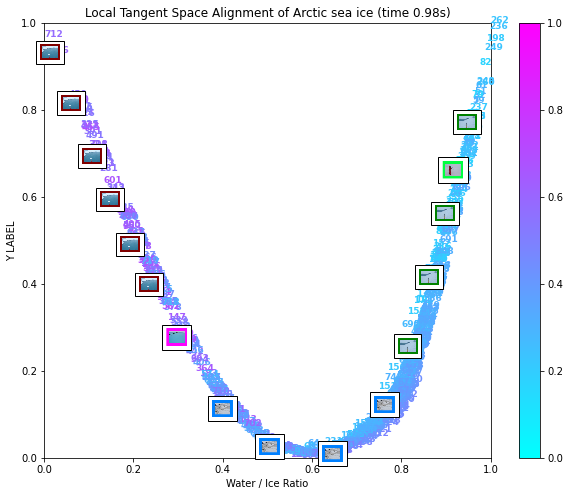

In [231]:
#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_yesthumb3(X_ltsa,
               "Local Tangent Space Alignment of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing MDS embedding
Stress: 36426.563196


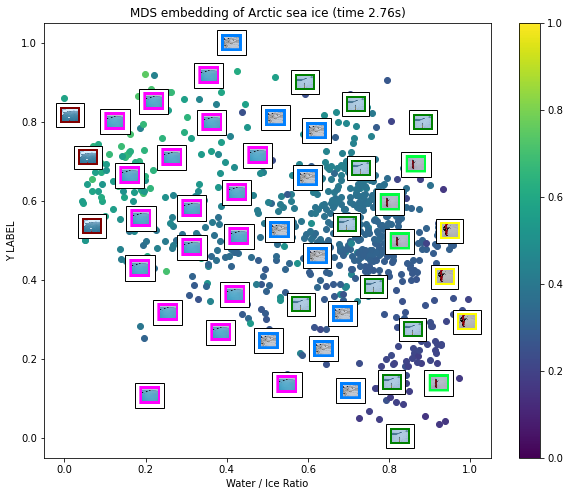

In [232]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Stress: %f" % clf.stress_)
plot_embedding_yesthumb1(X_mds,
               "MDS embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing MDS embedding
Stress: 34219.832167


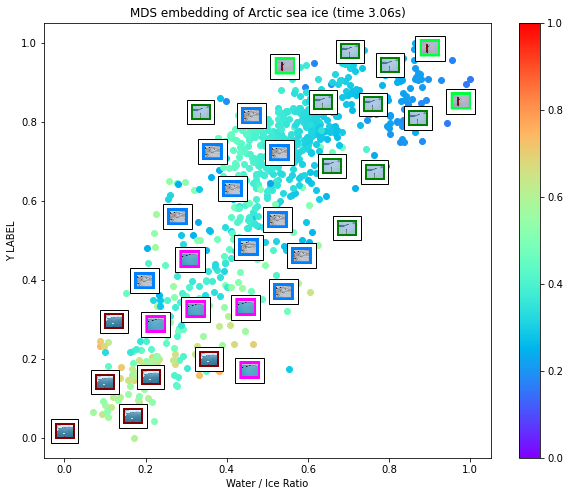

In [233]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Stress: %f" % clf.stress_)
plot_embedding_yesthumb2(X_mds,
               "MDS embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing MDS embedding
Stress: 17371.265374


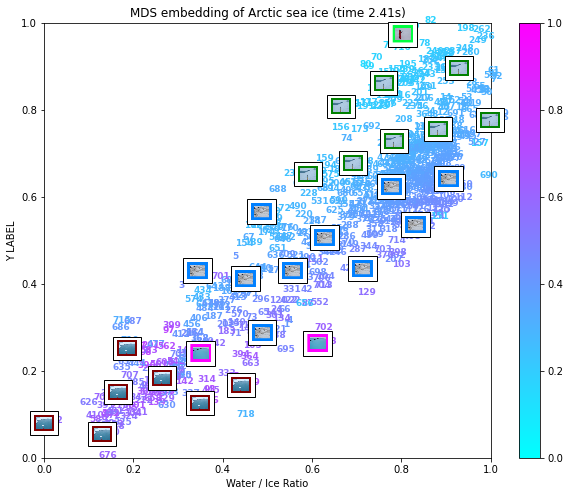

In [234]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Stress: %f" % clf.stress_)
plot_embedding_yesthumb3(X_mds,
               "MDS embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing t-SNE embedding


C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


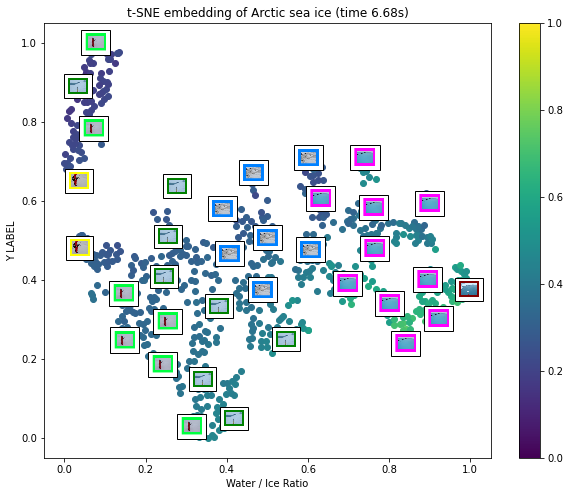

In [235]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding_yesthumb1(X_tsne,
               "t-SNE embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))

plt.show()


Computing t-SNE embedding


C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


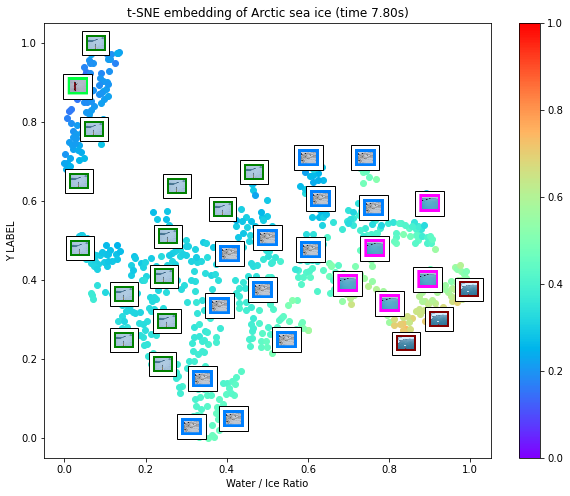

In [236]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding_yesthumb2(X_tsne,
               "t-SNE embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))

plt.show()


Computing t-SNE embedding


C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\myang\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


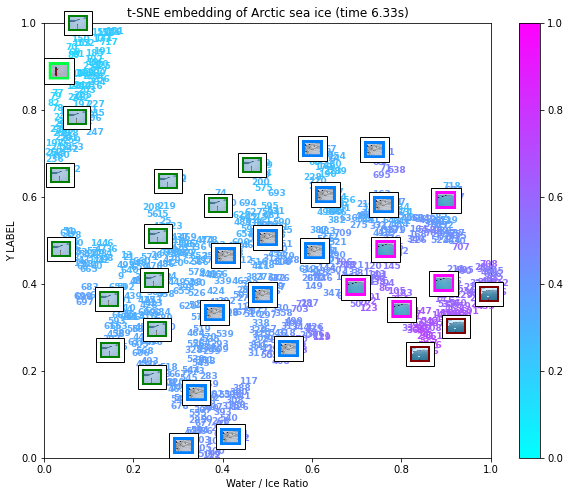

In [237]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding_yesthumb3(X_tsne,
               "t-SNE embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))

plt.show()


Computing Totally Random Trees embedding


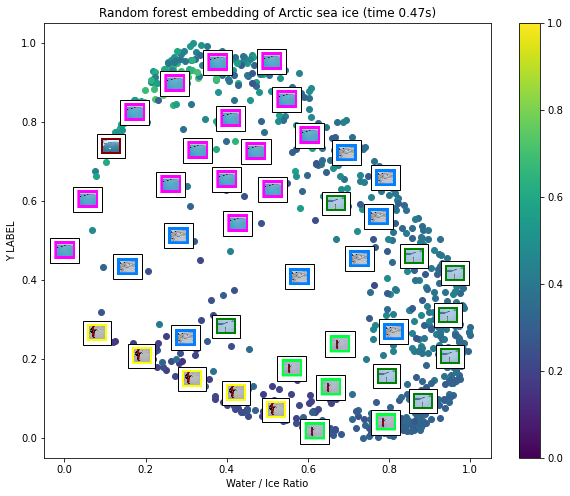

In [238]:
#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding_yesthumb1(X_reduced,
               "Random forest embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing Totally Random Trees embedding


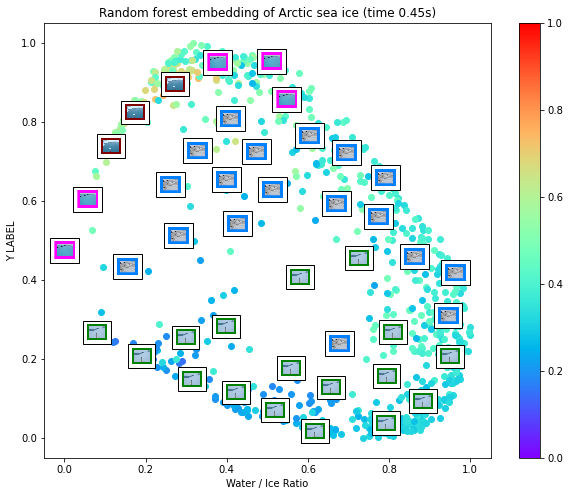

In [239]:
#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding_yesthumb2(X_reduced,
               "Random forest embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


Computing Totally Random Trees embedding


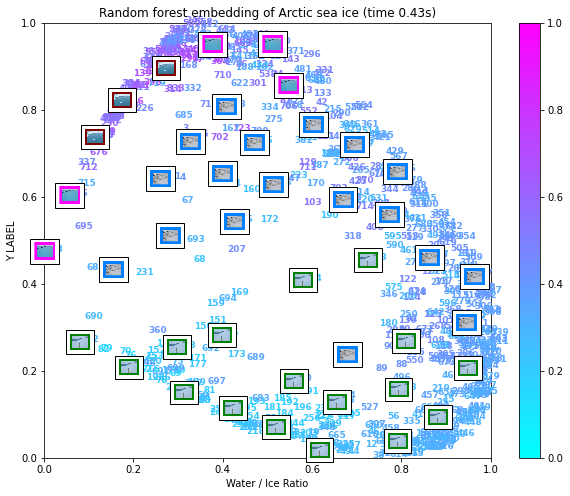

In [240]:
#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding_yesthumb3(X_reduced,
               "Random forest embedding of Arctic sea ice (time %.2fs)" %
               (time() - t0))


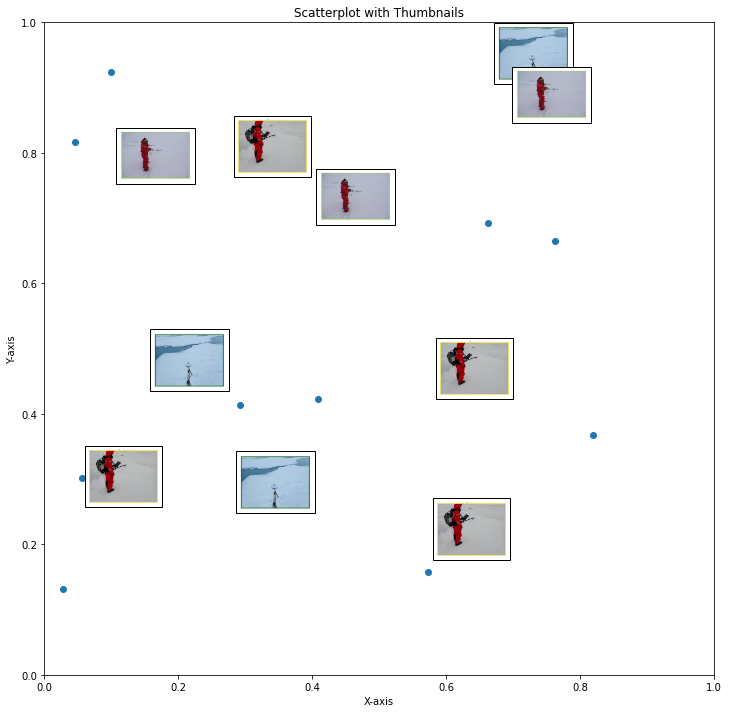

In [69]:
# Sample data for the scatterplot
data_sample = np.random.rand(10, 2)  # Example 2D data
#thumbnail_files = glob.glob(os.path.join(current_directory, "thumbnails\*.png"))
thumbnails = [plt.imread("dry_snow.png"), plt.imread("melting_snow.png"), plt.imread("bare_ice.png")]  # Replace with your thumbnail images

# Create the scatterplot
plt.figure(figsize=(12, 12))
plt.scatter(data[:, 0], data[:, 1])
ax = plt.subplot(111)

# Add thumbnails to the scatterplot
for i, (x, y) in enumerate(data):
    thumbnail = thumbnails[i % len(thumbnails)]  # Cycle through thumbnails if there are more points than thumbnails
    #imagebox = OffsetImage(thumbnail, zoom=0.1)  # You can adjust the zoom factor
    imagebox = offsetbox.AnnotationBbox(
        offsetbox.OffsetImage(thumbnail, cmap=plt.cm.gray_r, zoom=0.2),
        data_sample[i])
    ax.add_artist(imagebox)
    #ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    #plt.gca().add_artist(ab)

# Customize plot settings
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatterplot with Thumbnails")

plt.show()


In [49]:
thumbnail_files = glob.glob(os.path.join(current_directory, "thumbnails\*.png"))
thumbnail_files

['C:\\Users\\myang\\Documents\\Meesun\\_School\\_UVA\\_PhD\\Research\\IceSpectralLibraryAnalysis-main\\thumbnails\\bare_ice.png',
 'C:\\Users\\myang\\Documents\\Meesun\\_School\\_UVA\\_PhD\\Research\\IceSpectralLibraryAnalysis-main\\thumbnails\\dry_snow.png',
 'C:\\Users\\myang\\Documents\\Meesun\\_School\\_UVA\\_PhD\\Research\\IceSpectralLibraryAnalysis-main\\thumbnails\\melting_snow.png']

In [ ]:
# Sample data for the scatterplot
data = np.random.rand(10, 2)  # Example 2D data
thumbnails = [plt.imread("thumbnails\*.png"), plt.imread("thumbnail2.png")]  # Replace with your thumbnail images

# Create the scatterplot
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1])

# Add thumbnails to the scatterplot
for i, (x, y) in enumerate(data):
    thumbnail = thumbnails[i % len(thumbnails)]  # Cycle through thumbnails if there are more points than thumbnails
    imagebox = OffsetImage(thumbnail, zoom=0.1)  # You can adjust the zoom factor
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    plt.gca().add_artist(ab)

# Customize plot settings
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatterplot with Thumbnails")

plt.show()
